# Plant Identification using Deep Learning

In [1]:
%matplotlib inline

In [2]:
from fastai.vision.all import *
from nbdev.showdoc import *

set_seed(42)

In [3]:
torch.cuda.set_device(6)

In [4]:
bs = 64

In [5]:
path = 'plant_seedlings_v2'

In [6]:
image_files = get_image_files(path); image_files

(#6395) [Path('plant_seedlings_v2/black_grass/1.png'),Path('plant_seedlings_v2/black_grass/10.png'),Path('plant_seedlings_v2/black_grass/100.png'),Path('plant_seedlings_v2/black_grass/101.png'),Path('plant_seedlings_v2/black_grass/102.png'),Path('plant_seedlings_v2/black_grass/103.png'),Path('plant_seedlings_v2/black_grass/104.png'),Path('plant_seedlings_v2/black_grass/105.png'),Path('plant_seedlings_v2/black_grass/106.png'),Path('plant_seedlings_v2/black_grass/107.png')...]

## Data Loading

In [7]:
dblock = DataBlock(blocks = (ImageBlock, CategoryBlock),
                       get_items = get_image_files,
                       get_y = parent_label,
                       splitter = RandomSplitter(valid_pct=0.2,seed=42),
                       item_tfms = Resize(256),
                       batch_tfms = Normalize.from_stats(*imagenet_stats))

In [8]:
dls=dblock.dataloaders(path, bs=64)

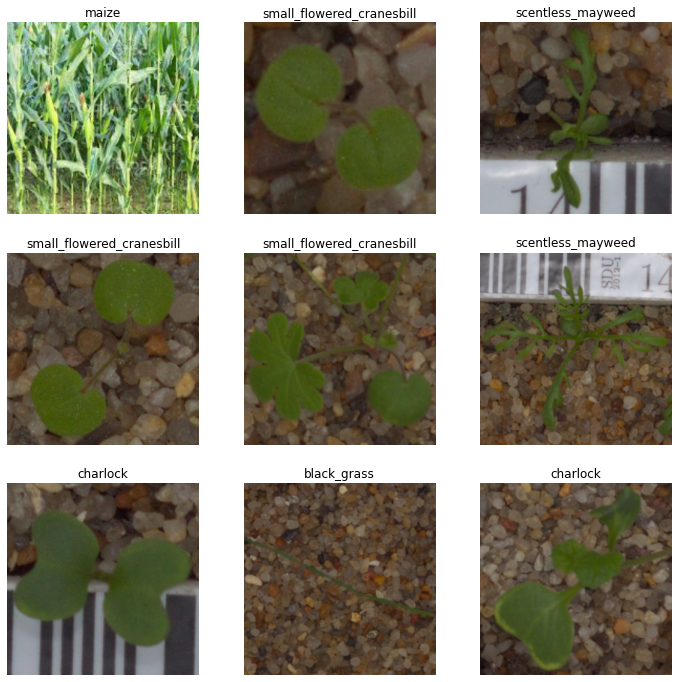

In [9]:
dls.show_batch(max_n=9, figsize=(12,12))

## Learning

In [10]:
learn = cnn_learner(dls,resnet152,metrics=[error_rate,accuracy])

/home/ele_group_2/miniconda3/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [19]:
learn.fit_one_cycle(15, lr_max=slice(2e-3,1e-1))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.187586,1.270961,0.157154,0.842846,00:31
1,0.641238,3.062427,0.381548,0.618452,00:31
2,1.989344,3.271137,0.242377,0.757623,00:30
3,2.264692,13.863004,0.204066,0.795934,00:31
4,1.756077,14.231805,0.210321,0.789679,00:30
5,1.532285,13.830008,0.286161,0.713839,00:30
6,1.009708,56.280418,0.161845,0.838155,00:30
7,0.784173,24.270935,0.165754,0.834246,00:29
8,0.565453,52.803410,0.156372,0.843628,00:29
9,0.511057,23.581532,0.114934,0.885066,00:30


In [20]:
print("Accuracy: ", (learn.recorder.metrics[1].value))

Accuracy:  TensorBase(0.9320)


In [21]:
learn.save('new-stage-1')

Path('models/new-stage-1.pth')

SuggestedLRs(valley=1.2022644114040304e-05)

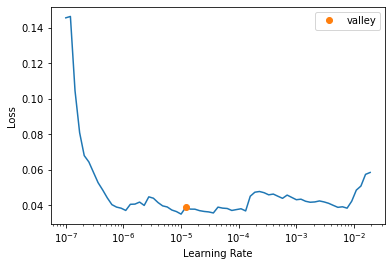

In [22]:
learn.lr_find()

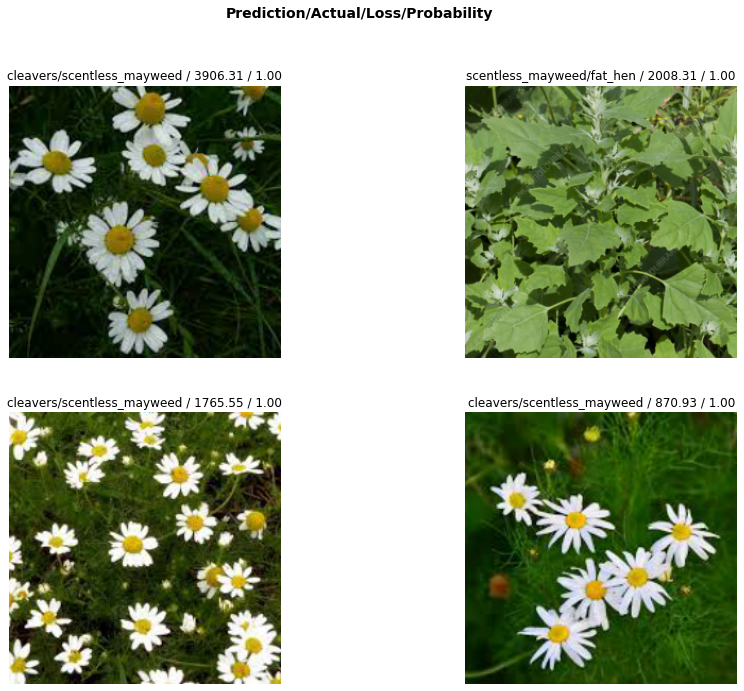

In [23]:
interpretation = ClassificationInterpretation.from_learner(learn)
losses, indices = interpretation.top_losses()
interpretation.plot_top_losses(4, figsize=(15,11))

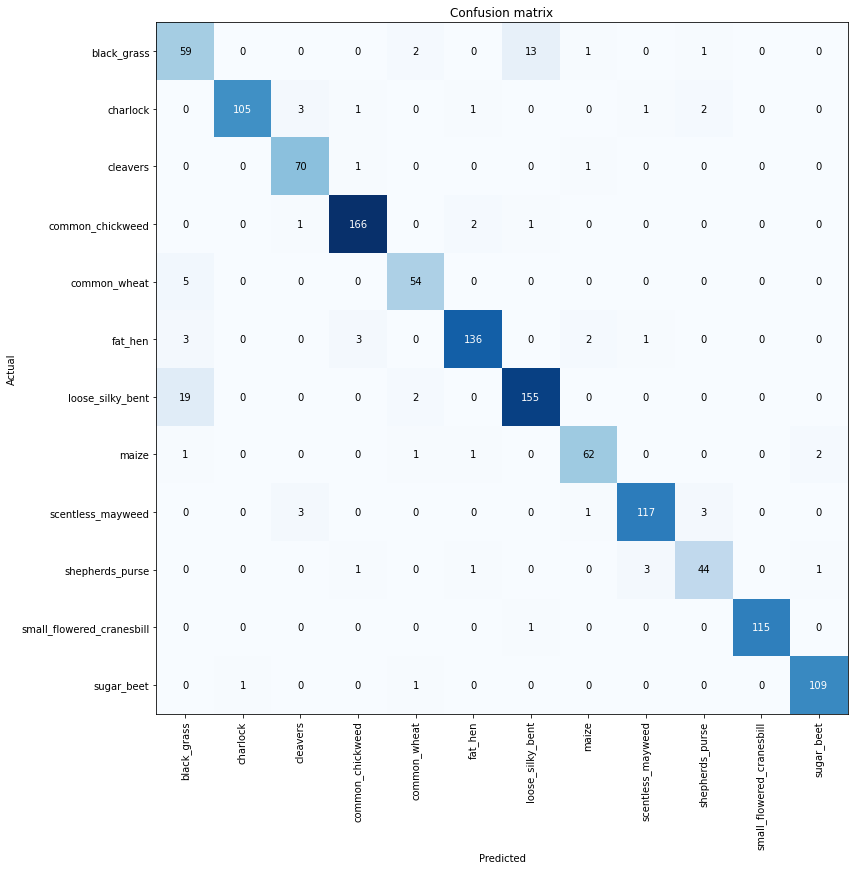

In [24]:
interpretation.plot_confusion_matrix(figsize=(12,12))

In [25]:
interpretation.most_confused(min_val=2)

[('loose_silky_bent', 'black_grass', 19),
 ('black_grass', 'loose_silky_bent', 13),
 ('common_wheat', 'black_grass', 5),
 ('charlock', 'cleavers', 3),
 ('fat_hen', 'black_grass', 3),
 ('fat_hen', 'common_chickweed', 3),
 ('scentless_mayweed', 'cleavers', 3),
 ('scentless_mayweed', 'shepherds_purse', 3),
 ('shepherds_purse', 'scentless_mayweed', 3),
 ('black_grass', 'common_wheat', 2),
 ('charlock', 'shepherds_purse', 2),
 ('common_chickweed', 'fat_hen', 2),
 ('fat_hen', 'maize', 2),
 ('loose_silky_bent', 'common_wheat', 2),
 ('maize', 'sugar_beet', 2)]

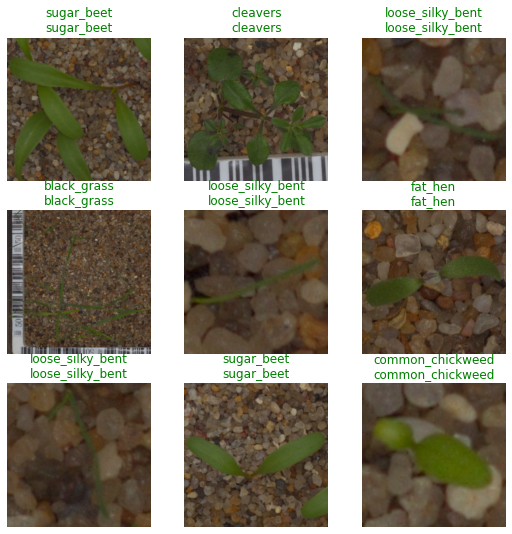

In [26]:
learn.show_results()

## Prediction

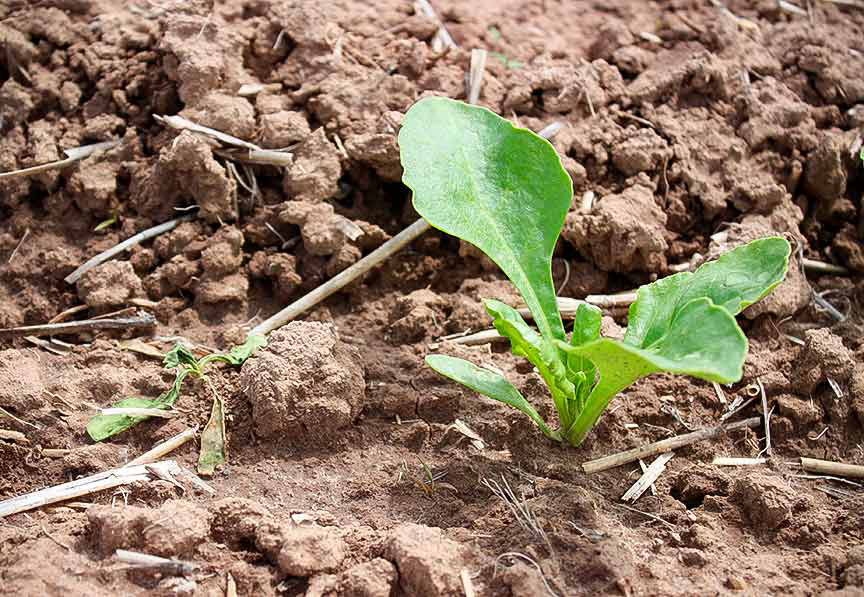

In [27]:
image_path = '123.png'
img=load_image(image_path)
img

In [28]:
label,_,probs = learn.predict(image_path)
print(label.split('/')[-1])
print(max(probs))

sugar_beet
tensor(0.9943)


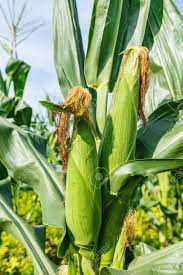

In [29]:
image_path1 = 'competition_group2/group2_dataset/076.jpg'
img1=load_image(image_path1)
img1

In [30]:
label,_,probs = learn.predict(image_path1)
print(label.split('/')[-1])
print(max(probs))

maize
tensor(1.)


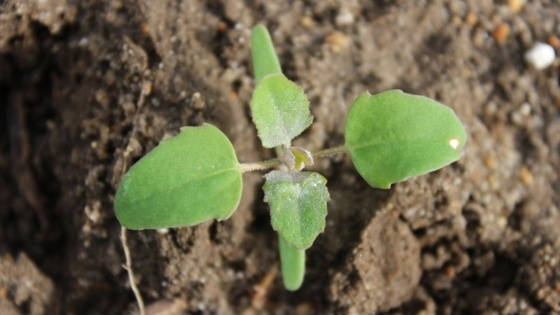

In [31]:
image_path2 = 'fat_hen.jpg'
img2=load_image(image_path2)
img2

In [32]:
label,_,probs = learn.predict(image_path2)
print(label.split('/')[-1])
print(max(probs))

fat_hen
tensor(0.9771)


In [33]:
image_path0 = 'competition_group2/group2_dataset/170.jpg'


In [34]:
label,_,probs = learn.predict(image_path0)
print(label.split('/')[-1])
print(max(probs))

black_grass
tensor(0.9907)


In [35]:
learn.export('/competition_group2/competition_group2.pkl')

FileNotFoundError: [Errno 2] No such file or directory: '/competition_group2/competition_group2.pkl'